In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('dfavgscores238.xlsx', index_col= 0)

I want to choose a dataset from the filtered one ( z score etc. ) and then do these correlation thingies for the numeric data. 

In [3]:
identifier_columns = ['Country','ASBH02A','avgscore']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

## The below is for comparing columns that are non-numeric. 

In [4]:
freq_table = (df['avgscore'].value_counts(normalize = True, bins=10)*100).sort_index()
freq_table

(83.868, 151.789]      0.333615
(151.789, 219.036]     2.199927
(219.036, 286.283]     5.669044
(286.283, 353.53]      9.072888
(353.53, 420.777]     14.009428
(420.777, 488.024]    20.674483
(488.024, 555.271]    24.864015
(555.271, 622.517]    18.479391
(622.517, 689.764]     4.479633
(689.764, 757.011]     0.217575
Name: avgscore, dtype: float64

In [5]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [6]:
from scipy.stats import chi2_contingency

In [7]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore_binned'])

In [8]:
contingency_table.head()

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
ASBH02A,,,,,,,,,,
No,3,55,182,358,540,718,629,331,70,4
Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


In [9]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a confusion matrix
confusion_matrix = pd.crosstab(df['ASBH02A'], df['avgscore_binned'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.07709123028408166



Cramér's V is a statistical measure used to assess the strength of association between two nominal (categorical) variables. It is derived from the Chi-square statistic and ranges from 0 to 1, where:

0 indicates no association between the variables.
1 indicates a perfect association between the variables.
The value you provided, 0.077, is relatively close to 0, indicating a very weak association between the two variables.

Here's a general interpretation of Cramér's V:

0 to 0.1: Little or no association\
0.1 to 0.3: Weak association\
0.3 to 0.5: Moderate association\
Above 0.5: Strong association\

Since your Cramér's V is around 0.077, it suggests that the relationship between the two categorical variables in your analysis is negligible or very weak.

In [10]:
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [11]:
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Statistic: 245.83458534739597
P-value: 7.553360938216542e-48


1. Chi-Square Test Statistic: 245.83458534739597
The Chi-Square test statistic quantifies how much the observed frequencies in your data deviate from the expected frequencies under the assumption that the two categorical variables are independent.
A higher Chi-Square value generally indicates a greater difference between the observed and expected frequencies, suggesting a stronger association between the variables.
In your case, the Chi-Square statistic is quite large, indicating a noticeable deviation from the expected distribution if the variables were independent.
2. P-value: 7.553360938216542e-48
The P-value represents the probability of observing a Chi-Square statistic as extreme as, or more extreme than, the one calculated, under the null hypothesis (which states that the two variables are independent).
A very small P-value (like the one here, which is effectively 0.000...0000755) indicates that the observed association is highly unlikely to have occurred by chance.
Common thresholds for significance are 0.05, 0.01, and 0.001. Your P-value is far smaller than any of these, meaning you can reject the null hypothesis with extremely high confidence, suggesting a statistically significant association between the two variables.
Summary
Chi-Square Test Statistic (245.83): Indicates a substantial deviation from what would be expected under independence.
P-value (~0): Shows that this deviation is extremely unlikely to be due to random chance, indicating a statistically significant association.
However, the earlier Cramér's V value of 0.077 suggests that while the association is statistically significant, it is not strong. This can happen when the sample size is large, leading to statistically significant results even for weak associations.

In [31]:
contingency_table

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
ASBH02A,,,,,,,,,,
No,3,55,182,358,540,718,629,331,70,4
Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


In [14]:
# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_reset

avgscore_binned,ASBH02A,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
0,No,3,55,182,358,540,718,629,331,70,4
1,Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


In [15]:
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore_binned', value_name='count')
contingency_table_melted

,ASBH02A,avgscore_binned,count
0,No,"(83.869, 151.789]",3
1,Yes,"(83.869, 151.789]",135
2,No,"(151.789, 219.036]",55
3,Yes,"(151.789, 219.036]",855
4,No,"(219.036, 286.283]",182
5,Yes,"(219.036, 286.283]",2163
6,No,"(286.283, 353.53]",358
7,Yes,"(286.283, 353.53]",3395
8,No,"(353.53, 420.777]",540
9,Yes,"(353.53, 420.777]",5255


In [16]:
# Convert Interval objects to strings
contingency_table_melted['avgscore_binned'] = contingency_table_melted['avgscore_binned'].astype(str)

In [17]:
import plotly.express as px

In [18]:
# Plot the heatmap using Plotly
fig = px.density_heatmap(contingency_table_melted, x='ASBH02A', y='avgscore_binned', z='count', color_continuous_scale='agsunset')
fig.update_layout(title='Heatmap of Frequency Counts')
fig.show()

I want to compare this by country

The above is not so useful - I need percentages again - but percentage of what? total nos and total yesses?

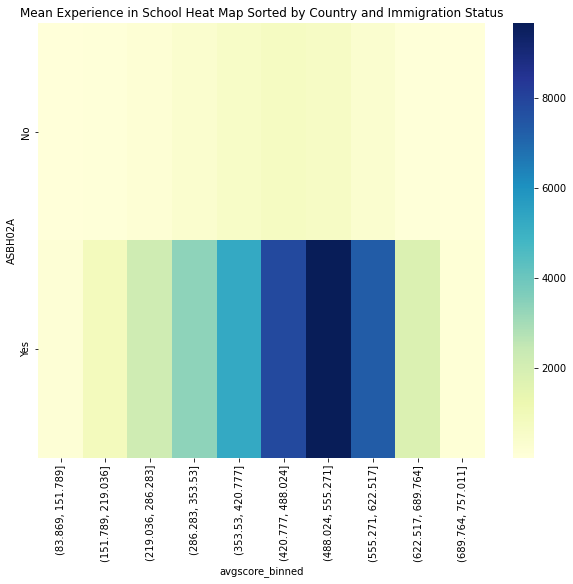

In [30]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=False, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

Should compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

## Let's see how crosstabbing works with multiple columns

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [19]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38671
0.0     1110
3.0      852
6.0      483
8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [20]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna(-1.0)

In [21]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

-1.0    38671
 0.0     1110
 3.0      852
 6.0      483
 8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [22]:
pivot_minage = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [23]:
pivot_minage

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,535.931404,524.691549,503.023525,482.467533,472.698753
Egypt,380.234984,382.087467,360.526565,353.167965,359.496124
France,522.219901,514.789067,500.251059,487.735549,449.952812
Germany,546.167948,513.748950,489.432386,491.374898,495.923077
Iran,422.308155,413.120203,437.669405,450.368901,429.309478
Jordan,368.776349,380.605999,385.670465,381.076742,372.786823
Netherlands,544.917812,546.704431,510.434272,532.347393,529.268667
Sweden,565.960709,547.588860,506.832225,496.426190,486.933911
Turkey,507.204903,461.440636,438.160717,469.426985,446.103548


In [24]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_minage.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

### Create a custom sorter for ASBH02A
## asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_minage.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
##index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_minage.loc[index_df.index]

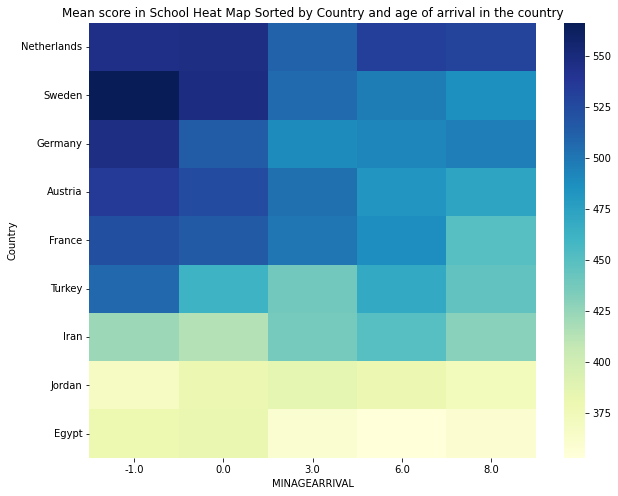

In [26]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=False, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()